In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv('/content/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [177]:
df.shape

(53940, 10)

In [178]:
df.duplicated().sum()

146

In [179]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [180]:
df.shape

(53794, 10)

In [181]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [182]:
num_columns = df.select_dtypes(include = ['int', 'float']).drop(columns = 'price')
cat_columns = df.select_dtypes(include = 'object')

In [183]:
num_columns.sample(5)

,carat,depth,table,x,y,z
8458,1.03,59.9,60.0,6.56,6.50,3.91
768,0.71,60.4,62.0,5.74,5.72,3.46
22768,1.40,60.0,58.0,7.24,7.29,4.36
41982,0.51,62.8,57.0,5.10,5.12,3.21
24691,0.41,63.2,58.0,4.68,4.72,2.97


In [184]:
num_columns.describe()

,carat,depth,table,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000


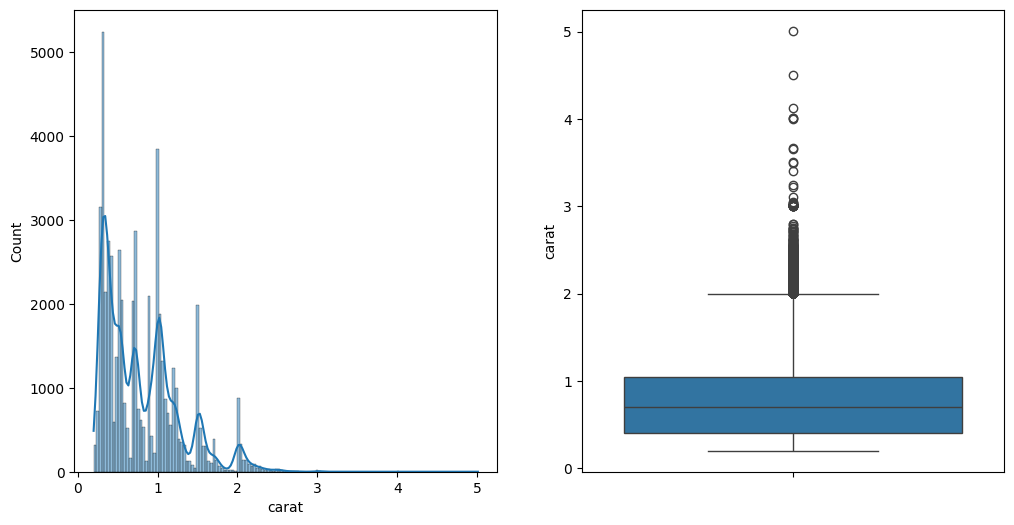

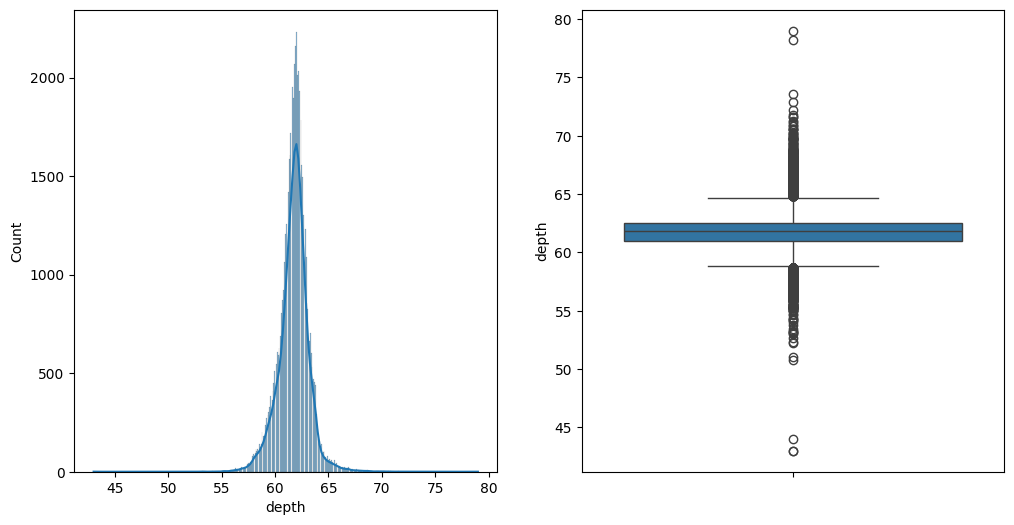

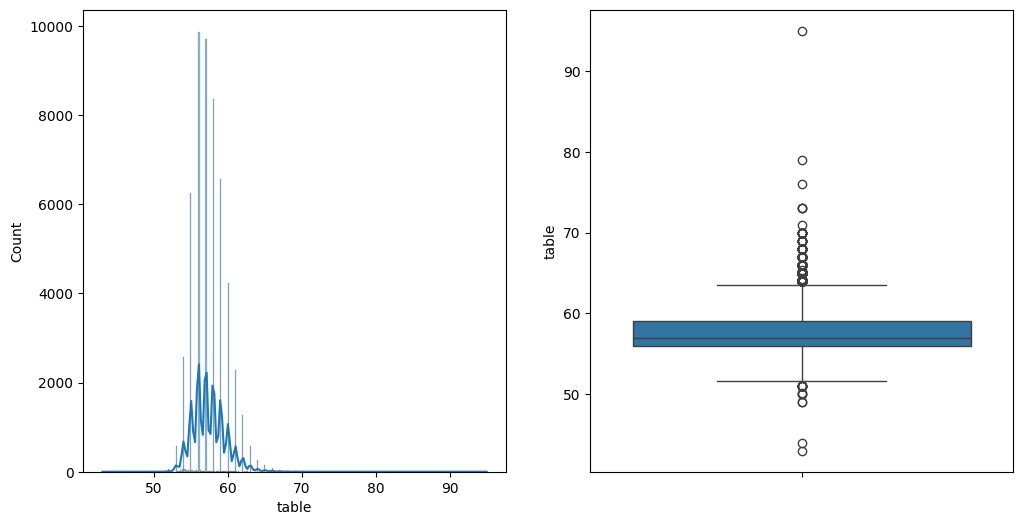

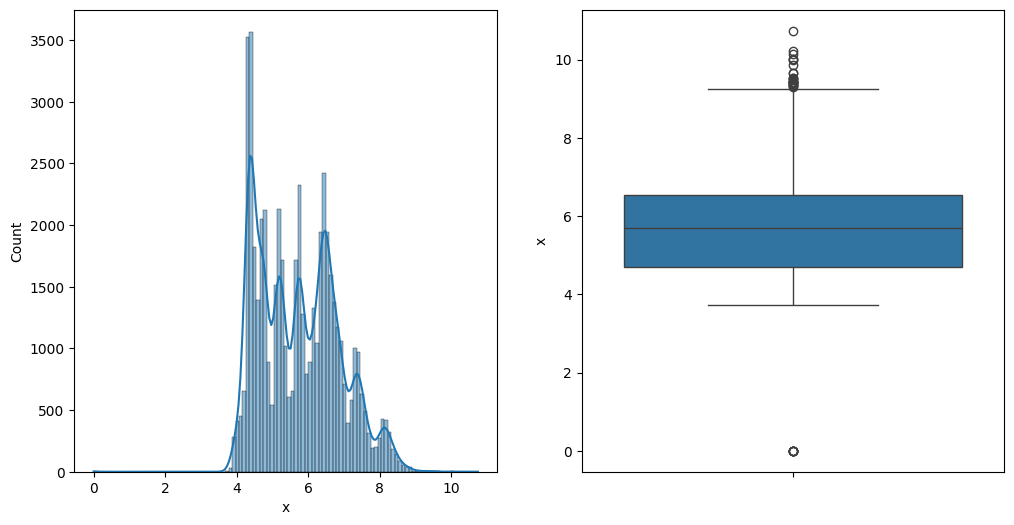

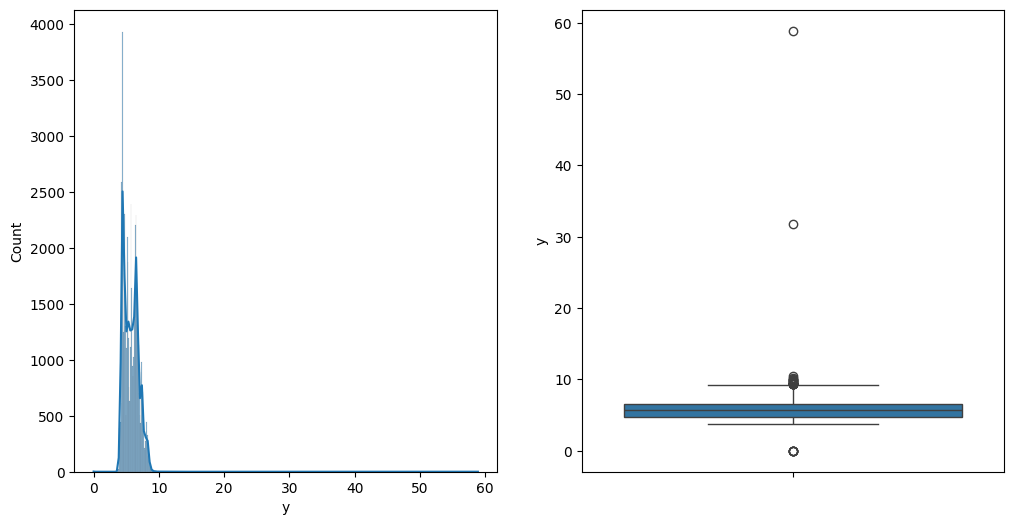

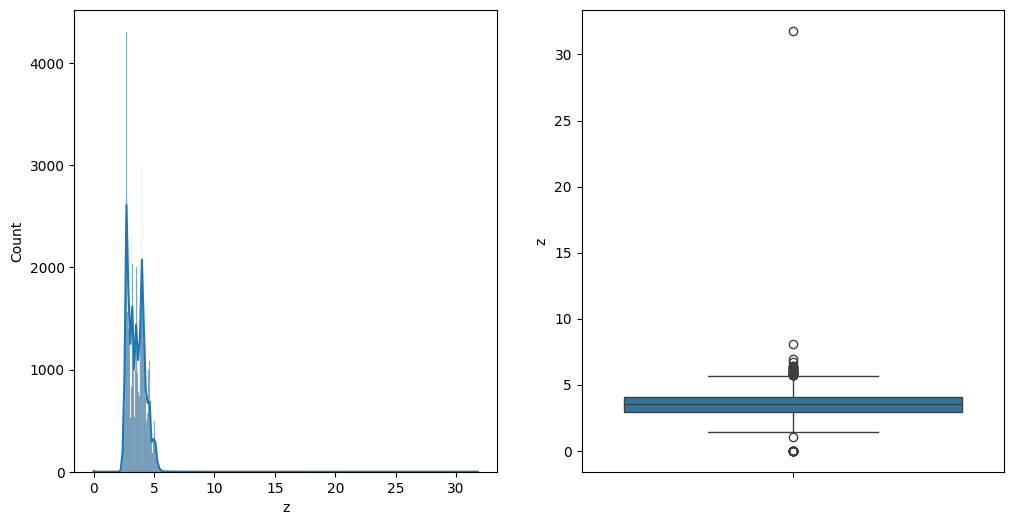

In [185]:
for col in num_columns.columns:
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde = True)

  plt.subplot(1, 2, 2)
  sns.boxplot(df[col])

  plt.show()

In [186]:
cat_columns.sample(5)

,cut,color,clarity
6363,Ideal,I,VS2
18816,Very Good,J,VS2
47903,Ideal,D,VS2
1108,Ideal,G,SI2
41117,Ideal,F,VVS2


In [187]:
for col in cat_columns.columns:
  print(f"values counts of {col}")
  print(df[col].value_counts())
  print('*' * 10)

values counts of cut
cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64
**********
values counts of color
color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64
**********
values counts of clarity
clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64
**********


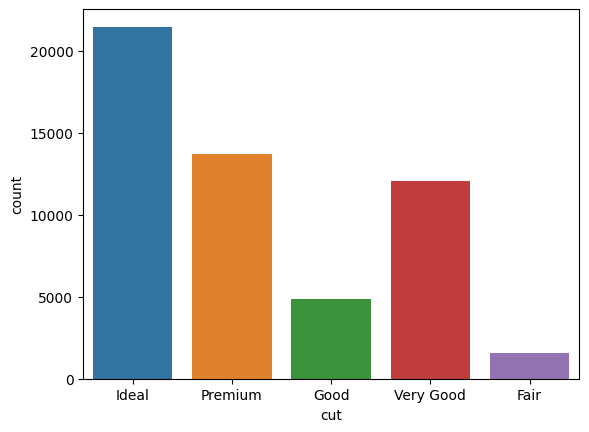

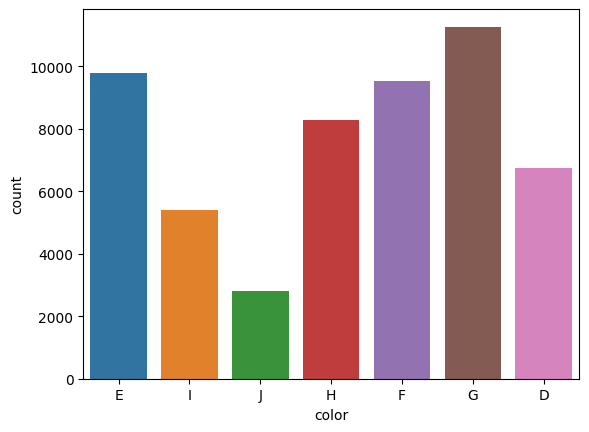

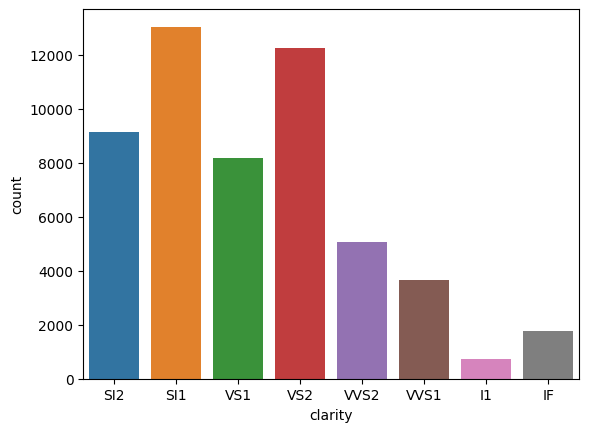

In [188]:
for col in cat_columns.columns:
  sns.countplot(x = col, data = df, hue = col)
  plt.show()

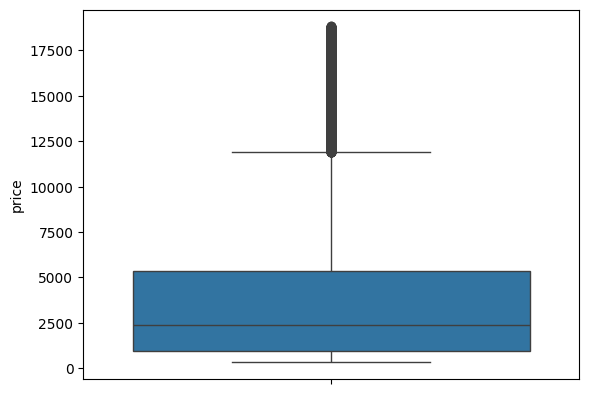

In [189]:
sns.boxplot(df['price'])
plt.show()

In [190]:
df['price'].describe()

,price
count,53794.000000
mean,3933.065082
std,3988.114460
min,326.000000
25%,951.000000
50%,2401.000000
75%,5326.750000
max,18823.000000


In [191]:
def outlier_count(df):
  outlier_length = {}
  for col in df.select_dtypes(include = ['int', 'float']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_length[col] = len(outliers)
  return outlier_length

print(outlier_count(df))

{'carat': 1873, 'depth': 2525, 'table': 604, 'price': 3523, 'x': 31, 'y': 28, 'z': 48}


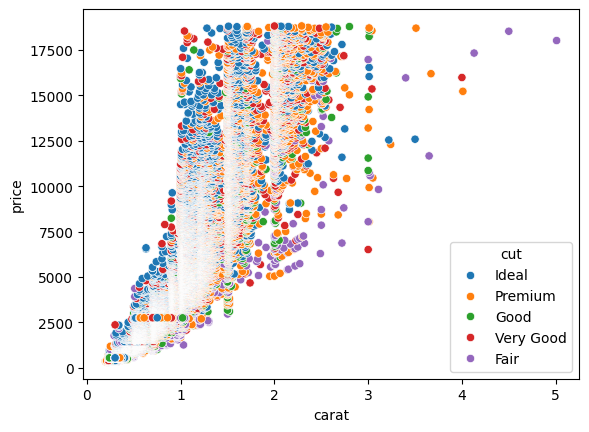

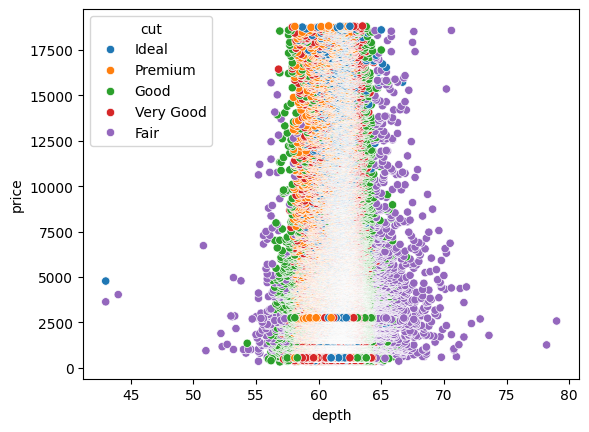

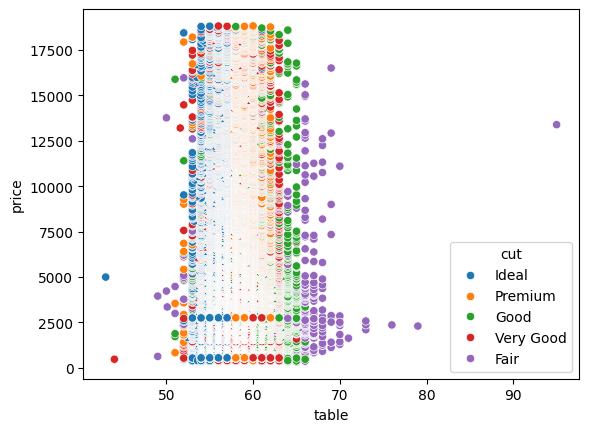

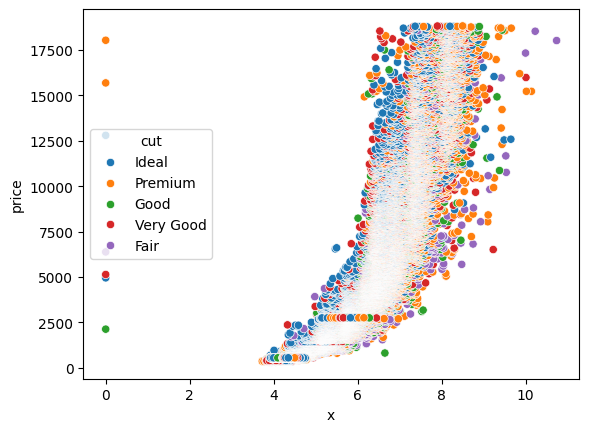

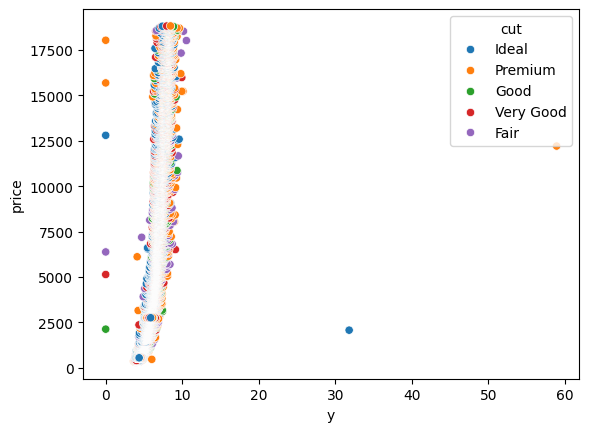

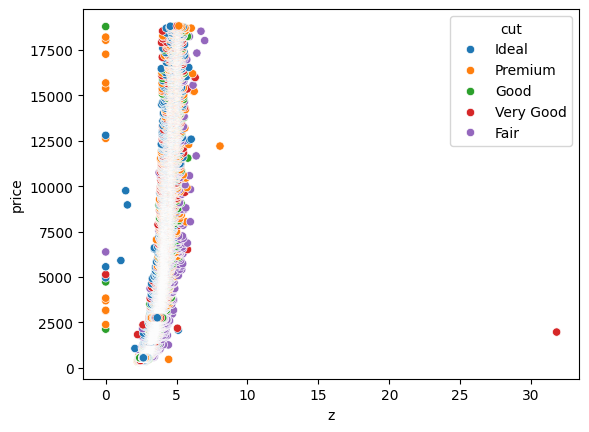

In [192]:
for col in num_columns.columns:
  sns.scatterplot(x = col, y = 'price', data = df, hue = 'cut')
  plt.show()

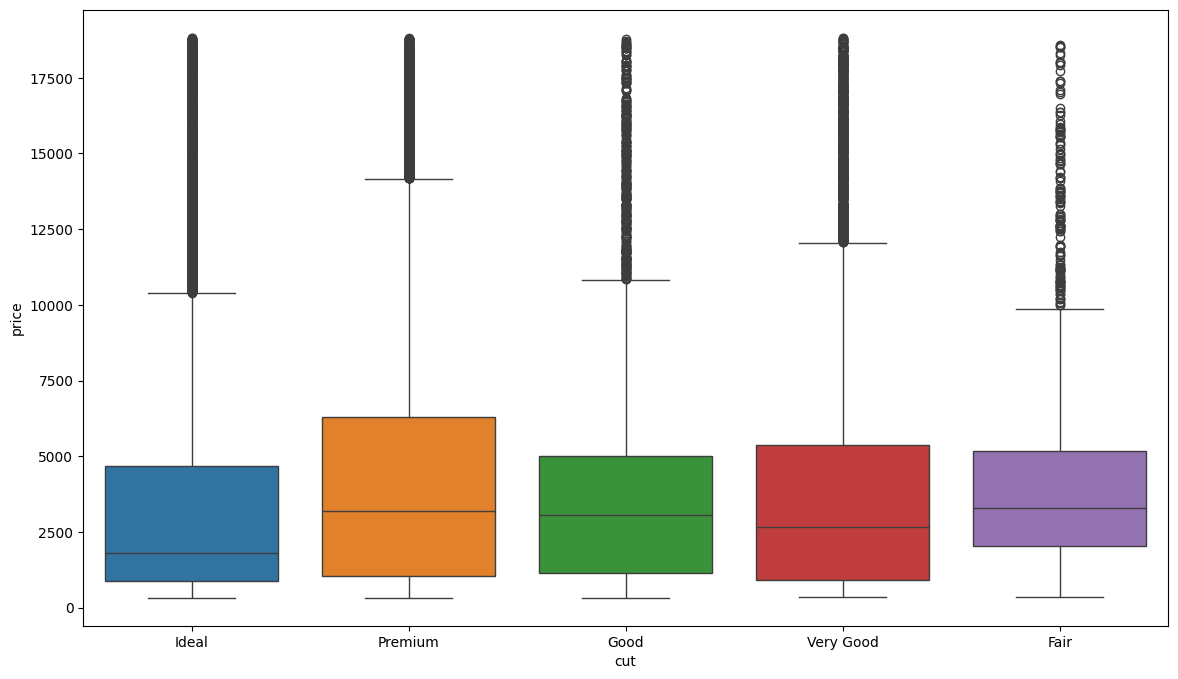

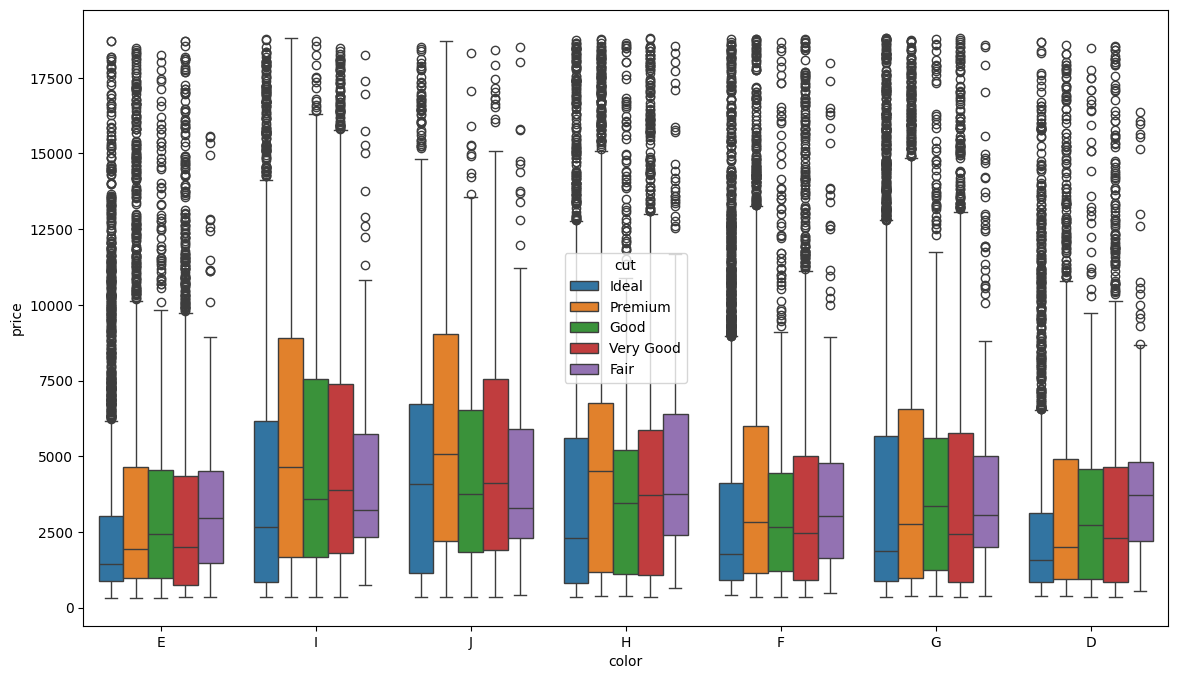

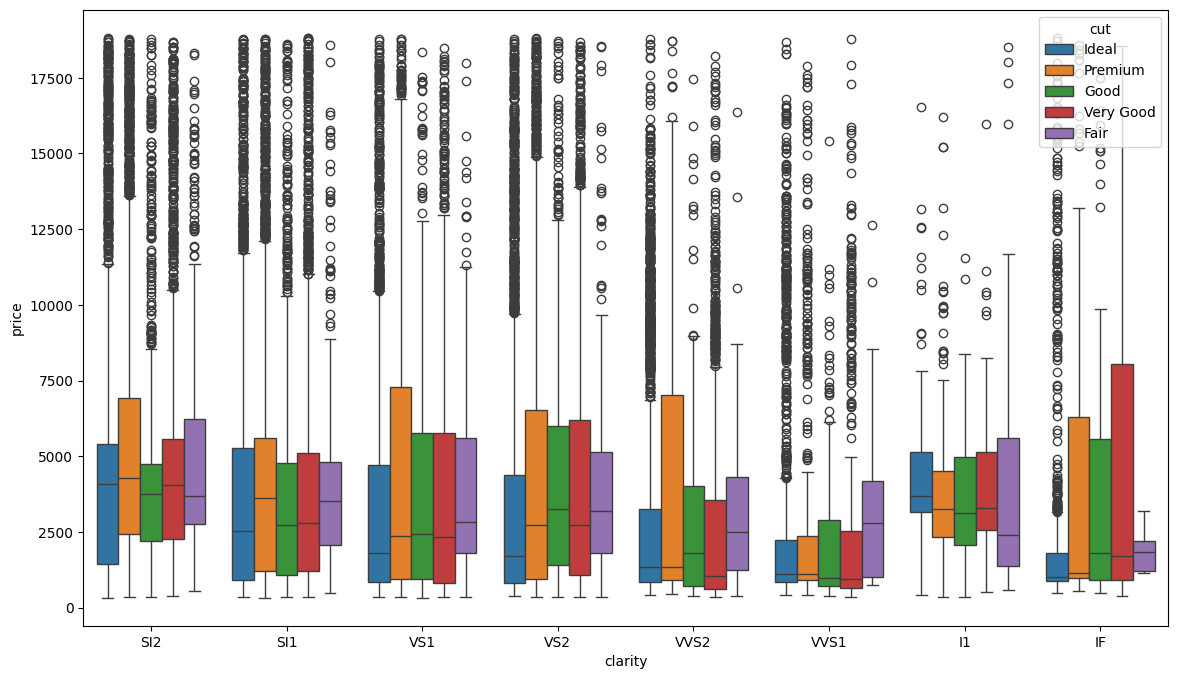

In [193]:
for col in cat_columns.columns:
  plt.figure(figsize = (14, 8))
  sns.boxplot(x = col, y = 'price', data = df, hue = 'cut')
  plt.show()


In [194]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [195]:
X = df.drop(columns = 'price')
y = df['price']

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [197]:
cols_to_encode = ['cut', 'color', 'clarity']

In [198]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[cols_to_encode])
X_test_encoded = encoder.transform(X_test[cols_to_encode])
encoder_columns = encoder.get_feature_names_out(cols_to_encode)

X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=encoder_columns, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=encoder_columns, index=X_test.index)

In [199]:
X_train_encoded.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33544,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26752,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45914,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3071,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43829,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [200]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
33544,0.35,Ideal,D,VS2,62.0,55.0,4.47,4.53,2.79
26752,2.21,Ideal,D,SI2,62.0,57.0,8.36,8.31,5.18
45914,0.53,Ideal,E,VS2,60.0,57.0,5.24,5.30,3.16
3071,0.80,Premium,D,SI1,61.7,58.0,5.96,5.93,3.67
43829,0.41,Ideal,E,VVS1,61.5,56.0,4.81,4.82,2.96


In [201]:
cols_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train[cols_to_scale])
scaled_test = scaler.transform(X_test[cols_to_scale])

X_train_scaled = pd.DataFrame(scaled_train, columns = cols_to_scale, index = X_train.index)
X_test_scaled = pd.DataFrame(scaled_test, columns = cols_to_scale, index = X_test.index)

In [205]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [206]:
X_train_scaled.describe()

,carat,depth,table,x,y,z
count,43035.00,43035.00,43035.00,43035.00,43035.00,43035.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.14,-6.48,-5.10,-4.98,-5.08
25%,-0.84,-0.52,-0.65,-0.91,-0.88,-0.90
50%,-0.21,0.04,-0.21,-0.04,-0.02,-0.03
75%,0.51,0.53,0.69,0.72,0.70,0.72
max,8.85,12.09,16.81,4.45,46.13,6.49


In [207]:
X_train_scaled.head()

,carat,depth,table,x,y,z
33544,-0.94,0.18,-1.10,-1.12,-1.05,-1.07
26752,2.96,0.18,-0.21,2.33,2.23,2.35
45914,-0.57,-1.23,-0.21,-0.44,-0.38,-0.54
3071,0.00,-0.03,0.24,0.20,0.17,0.19
43829,-0.82,-0.17,-0.65,-0.82,-0.80,-0.83


In [208]:
X_train = pd.concat([X_train_scaled, X_train_encoded], axis = 1)
X_test = pd.concat([X_test_scaled, X_test_encoded], axis = 1)
X_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33544,-0.94,0.18,-1.10,-1.12,-1.05,-1.07,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
26752,2.96,0.18,-0.21,2.33,2.23,2.35,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
45914,-0.57,-1.23,-0.21,-0.44,-0.38,-0.54,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3071,0.00,-0.03,0.24,0.20,0.17,0.19,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
43829,-0.82,-0.17,-0.65,-0.82,-0.80,-0.83,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [209]:
pd.set_option('display.max_columns', None)

In [210]:
X_test.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43657,-0.19,2.21,-1.55,-0.09,-0.18,0.12,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4274,0.21,-0.52,0.69,0.36,0.38,0.32,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
47412,-0.48,0.25,-0.65,-0.38,-0.35,-0.34,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
44437,-0.61,0.53,1.14,-0.58,-0.55,-0.52,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
13975,0.82,0.39,-1.10,0.95,0.94,1.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [211]:
X_train.isnull().sum()

,0
carat,0
depth,0
table,0
x,0
y,0
z,0
cut_Fair,0
cut_Good,0
cut_Ideal,0
cut_Premium,0


In [212]:
X_test.isnull().sum()

,0
carat,0
depth,0
table,0
x,0
y,0
z,0
cut_Fair,0
cut_Good,0
cut_Ideal,0
cut_Premium,0


In [214]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
ada_model = AdaBoostRegressor()
gb_model = GradientBoostingRegressor()
knn_model = KNeighborsRegressor()

def built_evaluate_models(x_train, x_test, y_train, y_test):
  models = [lr_model, ridge_model, lasso_model, dt_model, rf_model, ada_model, gb_model, knn_model]
  model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'KNN Refression']
  model_scores = []

  for model, model_name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores.append([model_name, rmse, r2, mae])

  scores_df = pd.DataFrame(model_scores, columns = ['Model', 'RMSE', 'R2 Score', 'MAE'])
  return scores_df

scores = built_evaluate_models(X_train, X_test, y_train, y_test)
scores

,Model,RMSE,R2 Score,MAE
0,Linear Regression,1102.31,0.92,725.27
1,Ridge Regression,1102.33,0.92,725.26
2,Lasso Regression,1102.50,0.92,723.50
3,Decision Tree,702.72,0.97,348.81
4,Random Forest,521.57,0.98,263.21
5,AdaBoost,1428.37,0.87,1081.37
6,Gradient Boosting,721.52,0.97,400.32
7,KNN Refression,759.43,0.96,395.47


In [215]:
X_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33544,-0.94,0.18,-1.10,-1.12,-1.05,-1.07,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
26752,2.96,0.18,-0.21,2.33,2.23,2.35,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
45914,-0.57,-1.23,-0.21,-0.44,-0.38,-0.54,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3071,0.00,-0.03,0.24,0.20,0.17,0.19,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
43829,-0.82,-0.17,-0.65,-0.82,-0.80,-0.83,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [217]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [218]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [219]:
X = df[['cut', 'color', 'clarity', 'carat']]
y = df['price']

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [221]:
cols_to_encode = ['cut', 'color', 'clarity']

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[cols_to_encode])
X_test_encoded = encoder.transform(X_test[cols_to_encode])
encoder_columns = encoder.get_feature_names_out(cols_to_encode)

X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=encoder_columns, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=encoder_columns, index=X_test.index)

In [222]:
cols_to_scale = ['carat']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train[cols_to_scale])
scaled_test = scaler.transform(X_test[cols_to_scale])

X_train_scaled = pd.DataFrame(scaled_train, columns = cols_to_scale, index = X_train.index)
X_test_scaled = pd.DataFrame(scaled_test, columns = cols_to_scale, index = X_test.index)

In [223]:
X_train = pd.concat([X_train_scaled, X_train_encoded], axis = 1)
X_test = pd.concat([X_test_scaled, X_test_encoded], axis = 1)
X_train.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
45307,-1.05,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
15892,0.44,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
22182,0.44,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
48310,-1.15,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
32731,-1.03,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [224]:
X_test.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43657,-0.19,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4274,0.21,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
47412,-0.48,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
44437,-0.61,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
13975,0.82,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [228]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of Random Forest: {mae}")

Mean Absolute Error of Random Forest: 293.40407576335423


In [227]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of KNN: {mae}")

Mean Absolute Error of KNN: 327.99356837474437
